# load data and libraries

In [ ]:
#install.packages("statnet")
install.packages("ergm.count")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘ergm’, ‘network’, ‘statnet.common’




In [ ]:
#library(statnet)
library(ergm.count)
library(tidyverse)
library(network)

Loading required package: ergm

Loading required package: network


‘network’ 1.17.1 (2021-06-12), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



‘ergm’ 4.1.2 (2021-07-26), part of the Statnet Project
* ‘news(package="ergm")’ for changes since last version
* ‘citation("ergm")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


‘ergm’ 4 is a major update that introduces some backwards-incompatible
changes. Please type ‘news(package="ergm")’ for a list of major
changes.



‘ergm.count’ 4.0.2 (2021-06-18), part of the Statnet Project
* ‘news(package="ergm.count")’ for changes since last version
* ‘citation("ergm.count")’ for citation information
* ‘https://statnet.org’ for help, support, and other information




In [ ]:
packageVersion("ergm")
packageVersion("network")

[1] ‘4.1.2’

[1] ‘1.17.1’

In [ ]:
set.seed(0)

In [ ]:
edge1 <- read.csv("edge1.csv")
edge2 <- read.csv("edge2.csv")
edge3 <- read.csv("edge3.csv")
#edge4 <- read.csv("edge4.csv")

icd101 <- read.csv("icd101.csv")
icd102 <- read.csv("icd102.csv")
icd103 <- read.csv("icd103.csv")
#icd104 <- read.csv("icd104.csv")

# making graphs and explore

In [ ]:
####### generate g1 ###########

icd10.g1 <- icd101[c("Id","Category","Prevalence_20192")]
edge.g1 <- edge1[c("Source","Target","Weight20192")]

start.time <- Sys.time()
g1 <- network(edge.g1[c("Source","Target")],directed = FALSE, vertices=icd10.g1)
delete.edges(g1, seq_along(g1$mel))
edge.g1 <- as.matrix(edge.g1, attrname="Weight20192", 
                           matrix.type="edgelist")

g1[edge.g1[ ,1:2], names.eval="weight", add.edges=TRUE,] <- round(as.numeric(edge.g1[,3])*100,0)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 4.471898 secs

In [ ]:
####### generate g2 ###########

icd10.g2 <- icd102[c("Id","Category","Prevalence_20201")]
edge.g2 <- edge2[c("Source","Target","Weight20201")]

start.time <- Sys.time()
g2 <- network(edge.g2[c("Source","Target")],directed = FALSE, vertices=icd10.g2)
delete.edges(g2, seq_along(g2$mel))
edge.g2 <- as.matrix(edge.g2, attrname="Weight20201", 
                           matrix.type="edgelist")
                           
g2[edge.g2[ ,1:2], names.eval="weight", add.edges=TRUE,] <- as.numeric(edge.g2[,3])
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 0.3405514 secs

In [ ]:
#icd10.g2 <- icd102[c("Id","Category","Prevalence_20201")]
#edge.g2 <- edge2[c("Source","Target","Weight20201")]

#g2 <- network(edge.g2[c("Source","Target")],directed = FALSE, vertices=icd10.g2)
#set.edge.attribute(g2,"weight",edge.g2$Weight20201)

In [ ]:
####### generate g3 ###########

icd10.g3 <- icd103[c("Id","Category","Prevalence_20202")]
edge.g3 <- edge3[c("Source","Target","Weight20202")]

start.time <- Sys.time()
g3 <- network(edge.g3[c("Source","Target")],directed = FALSE, vertices=icd10.g3)
delete.edges(g3, seq_along(g3$mel))
edge.g3 <- as.matrix(edge.g3, attrname="Weight20202", 
                           matrix.type="edgelist")
                           
g3[edge.g3[ ,1:2], names.eval="weight", add.edges=TRUE,] <- as.numeric(edge.g3[,3])
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 0.3031154 secs

In [ ]:
####### generate g4 (small network) ###########

icd10.g4 <- icd104[c("Id","Category","Prevalence_20202")]
edge.g4 <- edge4[c("Source","Target","Weight20202")]

start.time <- Sys.time()
g4 <- network(edge.g4[c("Source","Target")],directed = FALSE, vertices=icd10.g4)
delete.edges(g4, seq_along(g4$mel))
edge.g4 <- as.matrix(edge.g4, attrname="Weight20202", 
                           matrix.type="edgelist")
                           
g4[edge.g4[ ,1:2], names.eval="weight", add.edges=TRUE,] <- round(as.numeric(edge.g4[,3])*100,0)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 0.04607797 secs

In [ ]:
#,
#                control=control.ergm(MCMLE.density.guard = exp(8),force.main = TRUE, seed = 42, parallel = 5)

In [ ]:
edgall = read.csv("Edgelist_all.csv")

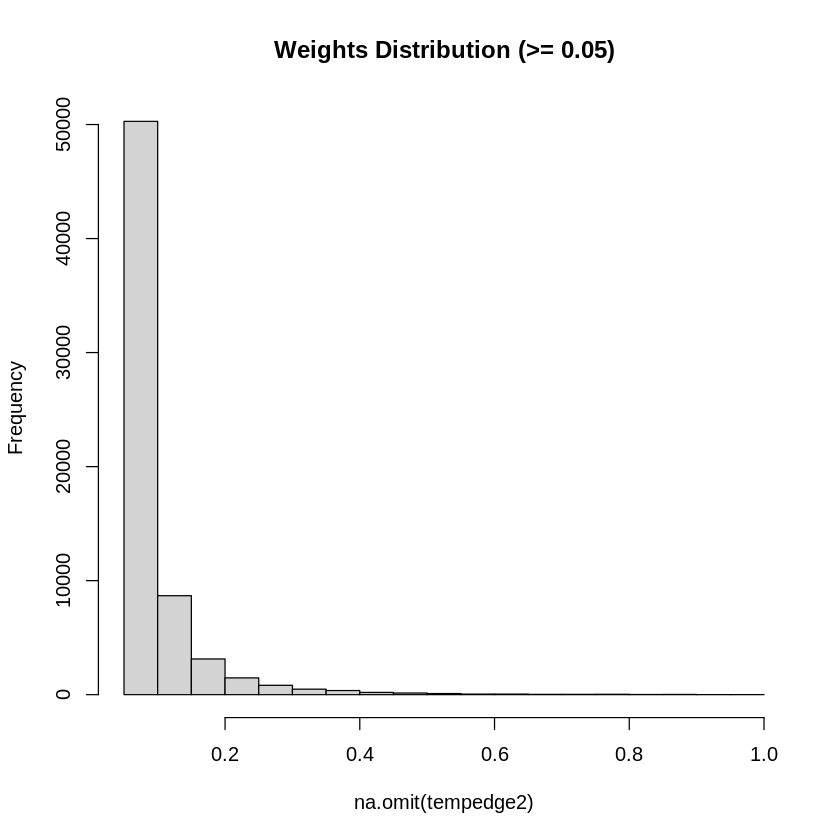

In [ ]:
#tempedge = c(edgall[,3],edgall[,4],edgall[,5])
tempedge2 = c(edge1[,3],edge2[,4],edge3[,5])
#hist(na.omit(tempedge), main = "Original Weights Distribution")
hist(na.omit(tempedge2), main = "Weights Distribution (>= 0.05)")

# first round experiment and output

In [ ]:
 MCMLE.density.guard = exp(10), MCMLE.density.guard = exp(10),+nodefactor("Category",levels=1,form="sum")
 control=control.ergm(MCMC.interval =10000, CD.maxit = 100, MCMLE.maxit = 100,MCMLE.density.guard = exp(8),seed = 42,force.main = TRUE)

In [ ]:
####### unweighted ergm1 #######
start.time <- Sys.time()
model01 <- ergm(g1 ~ edges+nodecov(~Prevalence_20192)+nodefactor("Category", levels=c(1,3,4,)),  
                control=control.ergm(MCMC.interval = 10000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model01)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Warning message in ergm.pl(nw = nw, fd = fd, m = m, theta.offset = init, control = control, :
“Too many unique dyads. MPLE is approximate, and MPLE standard errors are suspect.”
Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g1 ~ edges + nodecov(~Prevalence_20192) + nodefactor("Category"), 
    control = control.ergm(MCMC.interval = 10000, MCMLE.maxit = 100, 
        seed = 42))

Maximum Likelihood Results:

                                                                                   Estimate
edges                                                                            -7.425e+00
nodecov.Prevalence_20192                                                          4.621e-05
nodefactor.Category.Blood and immune disorders                                    1.550e-01
nodefactor.Category.Certain conditions originating in the perinatal period        1.011e+00
nodefactor.Category.Certain infectious and parasitic diseases                    -2.903e-01
nodefactor.Category.Congenital and chromosomal abnormalities                      6.510e-02
nodefactor.Category.Diseases of the circulatory system                            2.186e-02
nodefactor.Category.Diseases of the digestive system    

Time difference of 7.599813 mins

In [ ]:
####### unweighted ergm2 #######
start.time <- Sys.time()
model02 <- ergm(g2 ~ edges+nodecov(~Prevalence_20201)+nodefactor("Category"),  
                control=control.ergm(MCMC.interval = 10000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model02)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Warning message in ergm.pl(nw = nw, fd = fd, m = m, theta.offset = init, control = control, :
“Too many unique dyads. MPLE is approximate, and MPLE standard errors are suspect.”
Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g2 ~ edges + nodecov(~Prevalence_20201) + nodefactor("Category"), 
    control = control.ergm(MCMC.interval = 10000, MCMLE.maxit = 100, 
        seed = 42))

Maximum Likelihood Results:

                                                                                   Estimate
edges                                                                            -7.332e+00
nodecov.Prevalence_20201                                                          4.686e-05
nodefactor.Category.Blood and immune disorders                                    6.565e-02
nodefactor.Category.Certain conditions originating in the perinatal period        9.920e-01
nodefactor.Category.Certain infectious and parasitic diseases                    -4.532e-01
nodefactor.Category.Congenital and chromosomal abnormalities                      1.746e-01
nodefactor.Category.Diseases of the circulatory system                            5.379e-02
nodefactor.Category.Diseases of the digestive system    

Time difference of 7.777188 mins

In [ ]:
####### unweighted ergm3 #######
start.time <- Sys.time()
model03 <- ergm(g3 ~ edges+nodecov(~Prevalence_20202)+nodefactor("Category"),  
                control=control.ergm(MCMC.interval = 10000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model03)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Warning message in ergm.pl(nw = nw, fd = fd, m = m, theta.offset = init, control = control, :
“Too many unique dyads. MPLE is approximate, and MPLE standard errors are suspect.”
Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g3 ~ edges + nodecov(~Prevalence_20202) + nodefactor("Category"), 
    control = control.ergm(MCMC.interval = 10000, MCMLE.maxit = 100, 
        seed = 42))

Maximum Likelihood Results:

                                                                                   Estimate
edges                                                                            -7.242e+00
nodecov.Prevalence_20202                                                          4.079e-05
nodefactor.Category.Blood and immune disorders                                   -6.797e-03
nodefactor.Category.Certain conditions originating in the perinatal period        9.512e-01
nodefactor.Category.Certain infectious and parasitic diseases                    -4.552e-01
nodefactor.Category.Congenital and chromosomal abnormalities                      1.010e-01
nodefactor.Category.Diseases of the circulatory system                            7.366e-02
nodefactor.Category.Diseases of the digestive system    

Time difference of 7.453104 mins

In [ ]:
###### unweighted model1 with selected categories ######
start.time <- Sys.time()
model01 <- ergm(g1 ~ edges+nodecov(~Prevalence_20192)
                +nodefactor("Category", levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system")),  
                control=control.ergm(MCMC.interval = 10000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model01)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g1 ~ edges + nodecov(~Prevalence_20192) + nodefactor("Category", 
    levels = c("Other health services", "Endocrine, nutritional and metabolic diseases", 
        "Diseases of the circulatory system", "Mental and behavioural disorders", 
        "Diseases of the respiratory system")), control = control.ergm(MCMC.interval = 10000, 
    MCMLE.maxit = 100, seed = 42))

Maximum Likelihood Results:

                                                                    Estimate
edges                                                             -6.950e+00
nodecov.Prevalence_20192                                           4.579e-05
nodefactor.Category.Other health services                          9.511e-02
nodefactor.Category.Endocrine, nutritional and metabolic diseases  3.508e-01
nodefactor.Category.Diseases of the circulatory system            -2.104e-01
nodefactor.Category.Mental and behavioural disorders              -1.927e-01
nodefactor.Category.Diseases of the respi

Time difference of 9.622956 secs

In [ ]:
###### unweighted model2 with selected categories ######
start.time <- Sys.time()
model02 <- ergm(g2 ~ edges+nodecov(~Prevalence_20201)
                +nodefactor("Category", levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system")),  
                control=control.ergm(MCMC.interval = 10000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model02)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g2 ~ edges + nodecov(~Prevalence_20201) + nodefactor("Category", 
    levels = c("Other health services", "Endocrine, nutritional and metabolic diseases", 
        "Diseases of the circulatory system", "Mental and behavioural disorders", 
        "Diseases of the respiratory system")), control = control.ergm(MCMC.interval = 10000, 
    MCMLE.maxit = 100, seed = 42))

Maximum Likelihood Results:

                                                                    Estimate
edges                                                             -6.909e+00
nodecov.Prevalence_20201                                           4.649e-05
nodefactor.Category.Other health services                          8.818e-02
nodefactor.Category.Endocrine, nutritional and metabolic diseases  3.410e-01
nodefactor.Category.Diseases of the circulatory system            -1.530e-01
nodefactor.Category.Mental and behavioural disorders              -1.776e-01
nodefactor.Category.Diseases of the respi

Time difference of 10.87844 secs

In [ ]:
###### unweighted model3 with selected categories ######
start.time <- Sys.time()
model03 <- ergm(g3 ~ edges+nodecov(~Prevalence_20202)
                +nodefactor("Category", levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system")),  
                control=control.ergm(MCMC.interval = 10000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model03)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g3 ~ edges + nodecov(~Prevalence_20202) + nodefactor("Category", 
    levels = c("Other health services", "Endocrine, nutritional and metabolic diseases", 
        "Diseases of the circulatory system", "Mental and behavioural disorders", 
        "Diseases of the respiratory system")), control = control.ergm(MCMC.interval = 10000, 
    MCMLE.maxit = 100, seed = 42))

Maximum Likelihood Results:

                                                                    Estimate
edges                                                             -6.887e+00
nodecov.Prevalence_20202                                           4.050e-05
nodefactor.Category.Other health services                         -1.283e-02
nodefactor.Category.Endocrine, nutritional and metabolic diseases  3.708e-01
nodefactor.Category.Diseases of the circulatory system            -1.012e-01
nodefactor.Category.Mental and behavioural disorders              -2.034e-01
nodefactor.Category.Diseases of the respi

Time difference of 10.34863 secs

In [ ]:
summary(g4)

Network attributes:
  vertices = 715
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 497 
   missing edges = 0 
   non-missing edges = 497 
 density = 0.001947073 

Vertex attributes:

 Category:
   character valued attribute
   attribute summary:
   the 10 most common values are:
                                         Injury or poisoning 
                                                         270 
                          Diseases of the circulatory system 
                                                          67 
                                       Other health services 
                                                          61 
                                  abnormal clinical findings 
                                                          58 
Diseases of the musculoskeletal system and connective tissue 
                                                          53 
                Diseases of the skin and 

In [ ]:
#### valued-ergm weith selected category ####
start.time <- Sys.time()
model04 <- ergm(g4 ~ sum+nodecov(~Prevalence_20202)
                +nodefactor("Category", levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", 
                                                 "Injury or poisoning"),form="sum"),
                coef = -1, response = "weight", reference = ~Poisson,
                 control=control.ergm( MCMLE.density.guard = exp(6),seed = 42)
                )
summary(model04)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting contrastive divergence estimation via CD-MCMLE:

Iteration 1 of at most 60:

Convergence test P-value:5.3e-47

The log-likelihood improved by 1.158.

Iteration 2 of at most 60:

Convergence test P-value:5.6e-115

The log-likelihood improved by 0.4959.

Iteration 3 of at most 60:

Convergence test P-value:1.1e-63

The log-likelihood improved by 0.4242.

Iteration 4 of at most 60:

Convergence test P-value:8.1e-55

The log-likelihood improved by 0.3031.

Iteration 5 of at most 60:

Convergence test P-value:2.7e-03

The log-likelihood improved by 0.2147.

Iteration 6 of at most 60:

Convergence test P-value:1e-02

The log-likelihood improved by 0.1803.

Iteration 7 of at most 60:

Convergence test P-value:2e-04

The log-likelihood improved by 0.1526.

Iteration 8 of at most 60:

Convergence test P-value:1.9e-01

The log-likelihood improved by 0.098.

Iteration 9 of at most 60:

Convergence test P-value:8e-02

The log-likelihood improved by 0.07713.

Iteration 10 of at most 60:

C

Call:
ergm(formula = g4 ~ sum + nodecov(~Prevalence_20202) + nodefactor("Category", 
    levels = c("Other health services", "Endocrine, nutritional and metabolic diseases", 
        "Diseases of the circulatory system", "Injury or poisoning"), 
    form = "sum"), response = "weight", reference = ~Poisson, 
    control = control.ergm(MCMLE.density.guard = exp(6), seed = 42), 
    coef = -1)

Monte Carlo Maximum Likelihood Results:

                                                                        Estimate
sum                                                                   -1.146e+00
nodecov.sum.Prevalence_20202                                           6.559e-07
nodefactor.sum.Category.Other health services                         -1.325e-02
nodefactor.sum.Category.Endocrine, nutritional and metabolic diseases -6.604e-02
nodefactor.sum.Category.Diseases of the circulatory system             1.227e-02
nodefactor.sum.Category.Injury or poisoning                            1.021e-

Time difference of 1.04697 hours

In [ ]:
#### valued-ergm weith selected category ####
start.time <- Sys.time()
model04 <- ergm(g4 ~ sum+nodecov(~Prevalence_20202)
                +nodefactor("Category",form="sum"),
                coef = -1, response = "weight", reference = ~Poisson,
                 control=control.ergm( MCMLE.maxit = 100 ,MCMLE.density.guard = exp(6),seed = 42)
                )
summary(model04)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting contrastive divergence estimation via CD-MCMLE:

Iteration 1 of at most 60:

Convergence test P-value:1.2e-217

The log-likelihood improved by 1.703.

Iteration 2 of at most 60:

Convergence test P-value:4.8e-28

The log-likelihood improved by 0.3332.

Iteration 3 of at most 60:

Convergence test P-value:1.6e-25

The log-likelihood improved by 0.4706.

Iteration 4 of at most 60:

Convergence test P-value:2.4e-25

The log-likelihood improved by 0.356.

Iteration 5 of at most 60:

Convergence test P-value:5.7e-33

The log-likelihood improved by 0.4894.

Iteration 6 of at most 60:

Convergence test P-value:3.3e-28

The log-likelihood improved by 0.3152.

Iteration 7 of at most 60:

Convergence test P-value:6.9e-32

The log-likelihood improved by 0.3927.

Iteration 8 of at most 60:

Convergence test P-value:6.4e-27

The log-likelihood improved by 0.3138.

Iteration 9 of at most 60:

Convergence test P-value:1.1e-20

The log-likelihood improved by 0.2094.

Iteration 10 of at most 6

Call:
ergm(formula = g4 ~ sum + nodecov(~Prevalence_20202) + nodefactor("Category", 
    form = "sum"), response = "weight", reference = ~Poisson, 
    control = control.ergm(MCMLE.maxit = 100, MCMLE.density.guard = exp(6), 
        seed = 42), coef = -1)

Monte Carlo Maximum Likelihood Results:

                                                                                       Estimate
sum                                                                                  -1.363e+00
nodecov.sum.Prevalence_20202                                                          1.808e-06
nodefactor.sum.Category.Blood and immune disorders                                   -5.113e-02
nodefactor.sum.Category.Certain conditions originating in the perinatal period       -2.021e-02
nodefactor.sum.Category.Certain infectious and parasitic diseases                    -4.973e-01
nodefactor.sum.Category.Congenital and chromosomal abnormalities                     -1.581e-01
nodefactor.sum.Category.Diseas

Time difference of 1.276933 hours

In [ ]:
###### unweighted model3 with selected categories ######
start.time <- Sys.time()
model04 <- ergm(g4 ~ edges+nodecov(~Prevalence_20202)
                +nodefactor("Category"),  
                control=control.ergm(MCMC.interval = 10000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model04)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g4 ~ edges + nodecov(~Prevalence_20202) + nodefactor("Category"), 
    control = control.ergm(MCMC.interval = 10000, MCMLE.maxit = 100, 
        seed = 42))

Maximum Likelihood Results:

                                                                                   Estimate
edges                                                                            -5.742e+00
nodecov.Prevalence_20202                                                          9.535e-06
nodefactor.Category.Blood and immune disorders                                   -4.520e-01
nodefactor.Category.Certain conditions originating in the perinatal period       -1.051e-01
nodefactor.Category.Certain infectious and parasitic diseases                    -5.822e-01
nodefactor.Category.Congenital and chromosomal abnormalities                     -5.828e-01
nodefactor.Category.Diseases of the circulatory system                           -1.591e-01
nodefactor.Category.Diseases of the digestive system    

Time difference of 6.272759 secs

# New Experiment

In [ ]:
length(unique(icd103$Category))

[1] 20

### binary model

In [ ]:
, levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system")

In [ ]:
###### unweighted model1 with selected categories ######
start.time <- Sys.time()
model01 <- ergm(g1 ~ edges+nodecov(~Prevalence_20192)
                +nodefactor("Category", levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system")),  
                control=control.ergm(MCMC.interval = 1000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model01)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g1 ~ edges + nodecov(~Prevalence_20192) + nodefactor("Category", 
    levels = c("Other health services", "Endocrine, nutritional and metabolic diseases", 
        "Diseases of the circulatory system", "Mental and behavioural disorders", 
        "Diseases of the respiratory system")), control = control.ergm(MCMC.interval = 1000, 
    MCMLE.maxit = 100, seed = 42))

Maximum Likelihood Results:

                                                                    Estimate
edges                                                             -6.852e+00
nodecov.Prevalence_20192                                           2.859e-05
nodefactor.Category.Other health services                         -1.737e-02
nodefactor.Category.Endocrine, nutritional and metabolic diseases  3.346e-01
nodefactor.Category.Diseases of the circulatory system             7.365e-02
nodefactor.Category.Mental and behavioural disorders              -3.195e-01
nodefactor.Category.Diseases of the respir

Time difference of 1.911011 secs

In [ ]:
###### unweighted model2 with selected categories ######
start.time <- Sys.time()
model02 <- ergm(g2 ~ edges+nodecov(~Prevalence_20201)
                +nodefactor("Category", levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system")),  
                control=control.ergm(MCMC.interval = 1000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model02)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g2 ~ edges + nodecov(~Prevalence_20201) + nodefactor("Category", 
    levels = c("Other health services", "Endocrine, nutritional and metabolic diseases", 
        "Diseases of the circulatory system", "Mental and behavioural disorders", 
        "Diseases of the respiratory system")), control = control.ergm(MCMC.interval = 1000, 
    MCMLE.maxit = 100, seed = 42))

Maximum Likelihood Results:

                                                                    Estimate
edges                                                             -6.815e+00
nodecov.Prevalence_20201                                           3.088e-05
nodefactor.Category.Other health services                         -2.521e-02
nodefactor.Category.Endocrine, nutritional and metabolic diseases  2.587e-01
nodefactor.Category.Diseases of the circulatory system             1.068e-01
nodefactor.Category.Mental and behavioural disorders              -2.502e-01
nodefactor.Category.Diseases of the respir

Time difference of 1.923416 secs

In [ ]:
###### unweighted model3 with selected categories ######
start.time <- Sys.time()
model03 <- ergm(g3 ~ edges+nodecov(~Prevalence_20202)
                +nodefactor("Category", levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system")),  
                control=control.ergm(MCMC.interval = 1000 ,MCMLE.maxit = 100 ,seed = 42))
summary(model03)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = g3 ~ edges + nodecov(~Prevalence_20202) + nodefactor("Category", 
    levels = c("Other health services", "Endocrine, nutritional and metabolic diseases", 
        "Diseases of the circulatory system", "Mental and behavioural disorders", 
        "Diseases of the respiratory system")), control = control.ergm(MCMC.interval = 1000, 
    MCMLE.maxit = 100, seed = 42))

Maximum Likelihood Results:

                                                                    Estimate
edges                                                             -6.915e+00
nodecov.Prevalence_20202                                           2.891e-05
nodefactor.Category.Other health services                          1.894e-02
nodefactor.Category.Endocrine, nutritional and metabolic diseases  3.520e-01
nodefactor.Category.Diseases of the circulatory system             1.492e-01
nodefactor.Category.Mental and behavioural disorders              -9.370e-02
nodefactor.Category.Diseases of the respir

Time difference of 2.20007 secs

### valued_ERGM

In [ ]:
#### valued-ergm weith selected category ####
start.time <- Sys.time()
model05 <- ergm(g1 ~ sum+nodecov(~Prevalence_20192)
                +nodefactor("Category",levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system"),form="sum"),
                coef = -1, response = "weight", reference = ~Poisson,
                 control=control.ergm(MCMLE.density.guard = exp(6),seed = 42)
                )
summary(model05)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Starting contrastive divergence estimation via CD-MCMLE:

Iteration 1 of at most 60:

Convergence test P-value:3.7e-84

The log-likelihood improved by 1.144.

Iteration 2 of at most 60:

Convergence test P-value:2.4e-08

The log-likelihood improved by 0.1124.

Iteration 3 of at most 60:

Convergence test P-value:3.4e-06

The log-likelihood improved by 0.2163.

Iteration 4 of at most 60:

Convergence test P-value:1.9e-01

The log-likelihood improved by 0.08159.

Iteration 5 of at most 60:

Convergence test P-value:5.9e-09

The log-likelihood improved by 0.04984.

Iteration 6 of at most 60:

Convergence test P-value:5e-01

The log-likelihood improved by 0.04042.

Iteration 7 of at most 60:

Convergence test P-value:1.4e-02

The log-likelihood improved by 0.03735.

Iteration 8 of at most 60:

Convergence test P-value:9.3e-01

Convergence detected. Stopping.

The log-likelihood improved by 0.01324.

Finished CD.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of a

In [ ]:
#### valued-ergm weith selected category ####
start.time <- Sys.time()
model06 <- ergm(g2 ~ sum+nodecov(~Prevalence_20201)
                +nodefactor("Category",levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system"),form="sum"),
                coef = -1, response = "weight", reference = ~Poisson,
                 control=control.ergm( MCMLE.maxit = 100 ,MCMLE.density.guard = exp(7),seed = 42)
                )
summary(model06)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

In [ ]:
#### valued-ergm weith selected category ####
start.time <- Sys.time()
model07 <- ergm(g3 ~ sum+nodecov(~Prevalence_20202)
                +nodefactor("Category",levels=c("Other health services","Endocrine, nutritional and metabolic diseases",
                                                 "Diseases of the circulatory system", "Mental and behavioural disorders",
                                                 "Diseases of the respiratory system"),form="sum"),
                coef = -1, response = "weight", reference = ~Poisson,
                 control=control.ergm( MCMLE.maxit = 100 ,MCMLE.density.guard = exp(7),seed = 42)
                )
summary(model07)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

In [ ]:
summary(g1)

Network attributes:
  vertices = 6277
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 21774 
   missing edges = 0 
   non-missing edges = 21774 
 density = 0.001105435 

Vertex attributes:

 Category:
   character valued attribute
   attribute summary:
   the 10 most common values are:
                                         Injury or poisoning 
                                                        1524 
Diseases of the musculoskeletal system and connective tissue 
                                                         596 
                                       Other health services 
                                                         488 
                          Diseases of the circulatory system 
                                                         483 
                    Pregnancy, childbirth and the puerperium 
                                                         358 
                                  ab